In [1]:
import pandas as pd
data = pd.read_pickle('corpus.pkl')
data

,transcript,full_name
ali,"Ladies and gentlemen, please welcome to the st...",Ali Wong
anthony,"Thank you. Thank you. Thank you, San Francisco...",Anthony Jeselnik
bill,"[cheers and applause] All right, thank you! Th...",Bill Burr
bo,Bo What? Old MacDonald had a farm E I E I O An...,Bo Burnham
dave,This is Dave. He tells dirty jokes for a livin...,Dave Chappelle
hasan,[theme music: orchestral hip-hop] [crowd roars...,Hasan Minhaj
jim,[Car horn honks] [Audience cheering] [Announce...,Jim Jefferies
joe,[rock music playing] [audience cheering] [anno...,Joe Rogan
john,"All right, Petunia. Wish me luck out there. Yo...",John Mulaney
louis,Intro\nFade the music out. Let’s roll. Hold th...,Louis C.K.


In [2]:
from textblob import TextBlob #https://planspace.org/20150607-textblob_sentiment/
polarity = lambda x: TextBlob(x).sentiment.polarity# -1 denotes negative, and 1 denotes positive
subjectivity = lambda x: TextBlob(x).sentiment.subjectivity# 0 is fact, 1 is an opinion
data['polarity'] = data['transcript'].apply(polarity)
data['subjectivity'] = data['transcript'].apply(subjectivity)
data

,transcript,full_name,polarity,subjectivity
ali,"Ladies and gentlemen, please welcome to the st...",Ali Wong,0.069359,0.482403
anthony,"Thank you. Thank you. Thank you, San Francisco...",Anthony Jeselnik,0.055237,0.558976
bill,"[cheers and applause] All right, thank you! Th...",Bill Burr,0.016479,0.537016
bo,Bo What? Old MacDonald had a farm E I E I O An...,Bo Burnham,0.074514,0.539368
dave,This is Dave. He tells dirty jokes for a livin...,Dave Chappelle,-0.002690,0.513958
hasan,[theme music: orchestral hip-hop] [crowd roars...,Hasan Minhaj,0.086856,0.460619
jim,[Car horn honks] [Audience cheering] [Announce...,Jim Jefferies,0.044224,0.523382
joe,[rock music playing] [audience cheering] [anno...,Joe Rogan,0.004968,0.551628
john,"All right, Petunia. Wish me luck out there. Yo...",John Mulaney,0.082355,0.484137
louis,Intro\nFade the music out. Let’s roll. Hold th...,Louis C.K.,0.056665,0.515796


In [3]:
data.index

Index(['ali', 'anthony', 'bill', 'bo', 'dave', 'hasan', 'jim', 'joe', 'john',
       'louis', 'mike', 'ricky'],
      dtype='object')

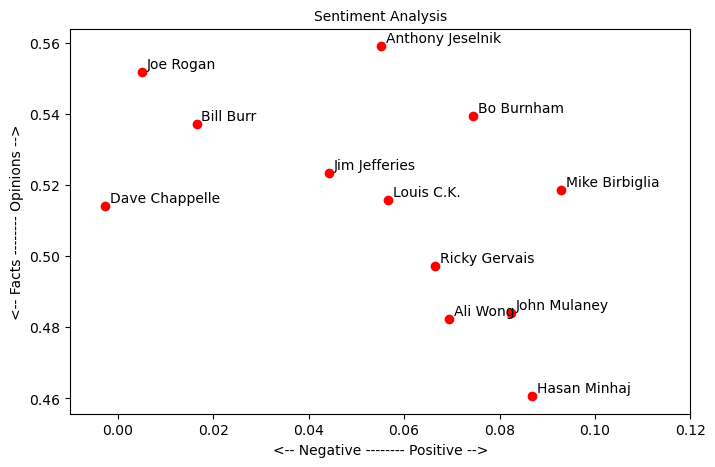

In [9]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8,5]
for index,comedian in enumerate(data.index):
    x = data.polarity.loc[comedian]
    y = data.subjectivity.loc[comedian]
    plt.scatter(x,y,color='red')
    plt.xlim(-.01, .12)
    plt.text(x+.001,y+.001,data['full_name'][index],fontsize=10)
plt.title('Sentiment Analysis', fontsize=10)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=10)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=10)

plt.show()

In [38]:
import numpy as np
import math
def split_text(text,n = 15): #split each text into n blocks
    length = len(text)
    size = math.floor(length/n)
    start = np.arange(0,length,size)
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list
list_pieces = []
for text in data.transcript:
    split = split_text(text)
    list_pieces.append(split)
list_pieces[0][0]

'Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have to get this shit over with, ’cause I have to pee in, like, ten minutes. But thank you, everybody, so much for coming. Um… It’s a very exciting day for me. It’s been a very exciting year for me. I turned 33 this year. Yes! Thank you, five people. I appreciate that. Uh, I can tell that I’m getting older, because, now, when I see an 18-year-old girl, my automatic thought… is “Fuck you.” “Fuck you. I don’t even know you, but fuck you!” ‘Cause I’m straight up jealous. I’m jealous, first and foremost, of their metabolism. Because 18-year-old girls, they could just eat like shit, and then they take a shit and have a six-pack, right? They got that-that beautiful inner thigh clearance where they put their feet together and there’s that huge gap here with the light of potential just radiating through.\nAnd then, when they go to sleep, they just go to 

In [39]:
polarity_transcript = []
for row in list_pieces:
    polarity_piece = []
    for col in row:
        polarity_piece.append(TextBlob(col).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
len(polarity_transcript)
#polarity_transcript

12

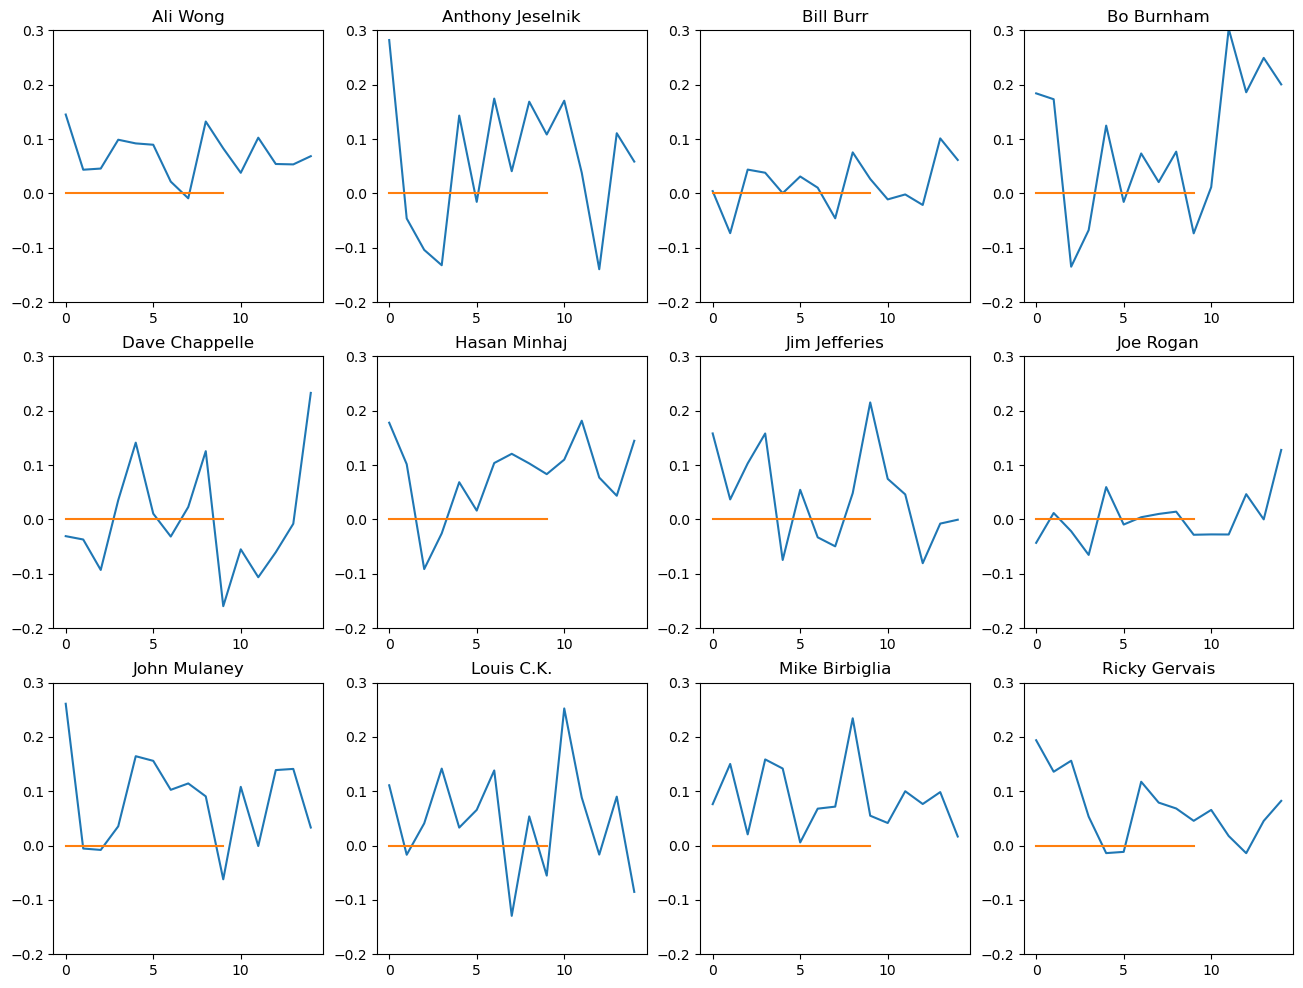

In [40]:
plt.rcParams['figure.figsize'] = [16, 12]
for index, comedian in enumerate(data.index):    
    plt.subplot(3, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['full_name'][index])
    plt.ylim(bottom=-.2, top=.3)
plt.show()

In [41]:
subjectivity_transcript = []
for row in list_pieces:
    subjectivity_piece = []
    for col in row:
        subjectivity_piece.append(TextBlob(col).sentiment.subjectivity)
    subjectivity_transcript.append(subjectivity_piece)
subjectivity_transcript

[[0.618338399189463,
  0.41809523809523813,
  0.42101485984464704,
  0.36073192239858914,
  0.42392915642915646,
  0.5035520712349982,
  0.4834967320261439,
  0.446751332567659,
  0.5266164799253035,
  0.5340909090909092,
  0.41118502956738245,
  0.6442780337941629,
  0.5163007054673723,
  0.5108686067019401,
  0.46547619047619043],
 [0.5422063492063492,
  0.6256696428571428,
  0.5784502635046114,
  0.6693432928727047,
  0.5465873015873015,
  0.63510101010101,
  0.47358217592592594,
  0.49622023809523796,
  0.5592490842490841,
  0.44956709956709956,
  0.5445566502463055,
  0.6858577533577535,
  0.5647175536881419,
  0.5138565138565139,
  0.47030723905723915],
 [0.6504898128405587,
  0.4803295855379187,
  0.4522042410714285,
  0.5879645400137203,
  0.5134708994708994,
  0.6046775258639666,
  0.5098750257678828,
  0.586734693877551,
  0.5023165401426269,
  0.5336879960317459,
  0.5541393849206351,
  0.5335127201565557,
  0.5216014739229027,
  0.5332915622389307,
  0.512106227106227],
 [0

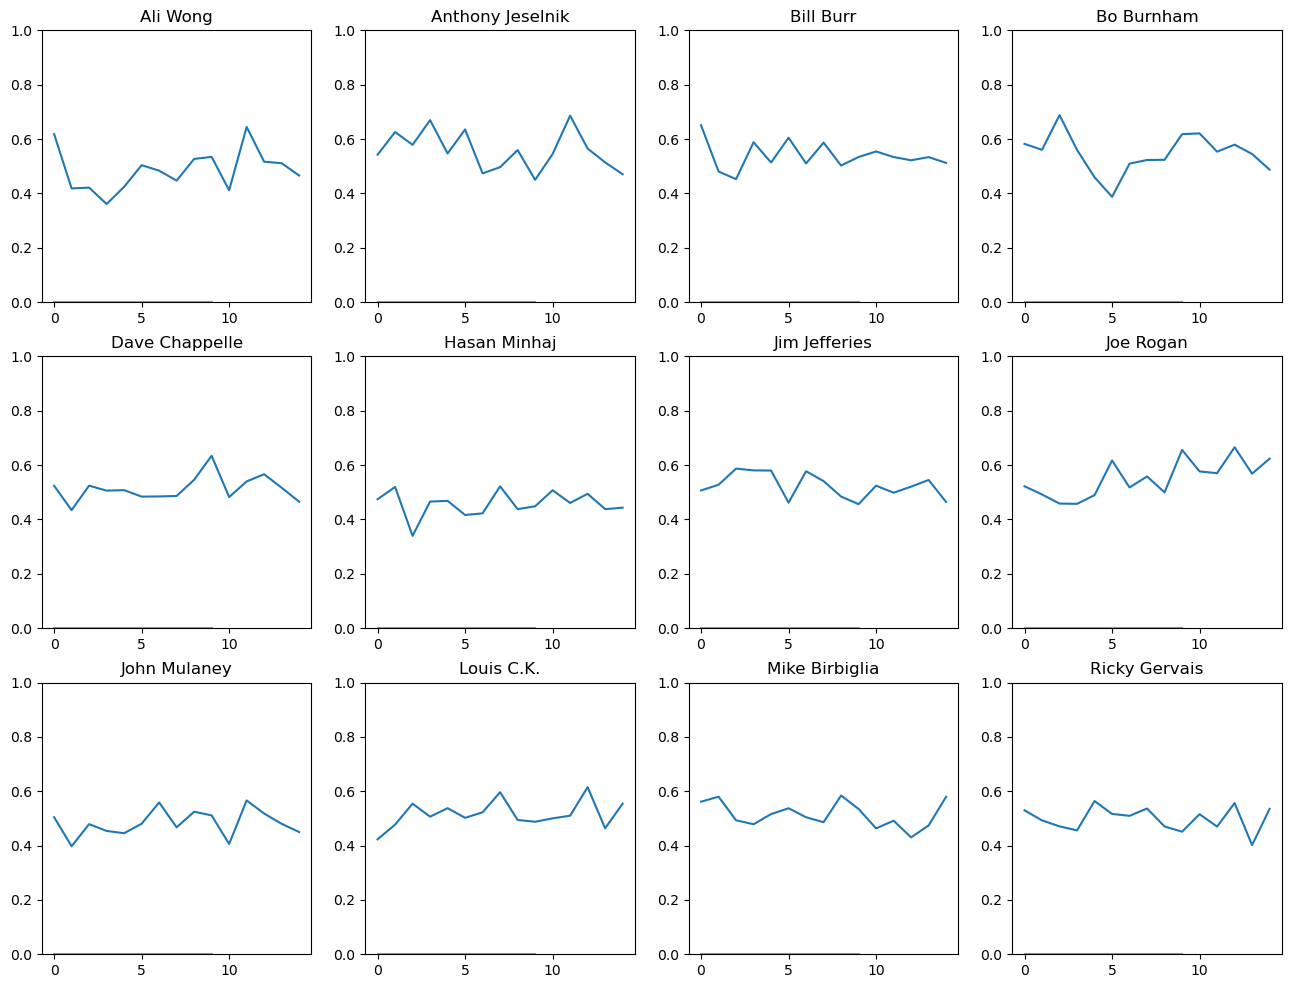

In [34]:
plt.rcParams['figure.figsize'] = [16, 12]
for index, comedian in enumerate(data.index):    
    plt.subplot(3, 4, index+1)
    plt.plot(subjectivity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['full_name'][index])
    plt.ylim(bottom=0, top=1)
plt.show()